# Case Study 

This case study is a part of Google Data Analysis Capstone Project.

### Scenario 
I'm a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company. Company's success depends on maximizing the number of annual memberships. Therefore, marketing team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, the team has to design a new marketing strategy to convert casual riders into annual members.

In [1]:
# importing required libraries

import pandas as pd
from pandas.api.types import CategoricalDtype

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

## Data Preparartion Phase

In [2]:
# uploading 12 .csv files
Jan_2021 = pd.read_csv('202101-divvy-tripdata.csv')
Feb_2021 = pd.read_csv('202102-divvy-tripdata.csv')
Mar_2021 = pd.read_csv('202103-divvy-tripdata.csv')
Apr_2021 = pd.read_csv('202104-divvy-tripdata.csv')
May_2021 = pd.read_csv('202105-divvy-tripdata.csv')
June_2021 = pd.read_csv('202106-divvy-tripdata.csv')
July_2021 = pd.read_csv('202107-divvy-tripdata.csv')
Aug_2021 = pd.read_csv('202108-divvy-tripdata.csv')
Sept_2021 = pd.read_csv('202109-divvy-tripdata.csv')
Oct_2021 = pd.read_csv('202110-divvy-tripdata.csv')
Nov_2021 = pd.read_csv('202111-divvy-tripdata.csv')
Dec_2021 = pd.read_csv('202112-divvy-tripdata.csv')

In [3]:
# joining 12 .csv files into 1 
df = pd.concat([Jan_2021, Feb_2021, Mar_2021, Apr_2021, May_2021, June_2021, July_2021, Aug_2021, Oct_2021, Nov_2021, Dec_2021])

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,23-01-2021 16:14,23-01-2021 16:24,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,27-01-2021 18:43,27-01-2021 18:47,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,21-01-2021 22:35,21-01-2021 22:37,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,07-01-2021 13:31,07-01-2021 13:42,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,23-01-2021 02:24,23-01-2021 02:24,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [5]:
# removing columns which are not required in analysis

df = df.drop(['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'], axis = 1)

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,E19E6F1B8D4C42ED,electric_bike,23-01-2021 16:14,23-01-2021 16:24,member
1,DC88F20C2C55F27F,electric_bike,27-01-2021 18:43,27-01-2021 18:47,member
2,EC45C94683FE3F27,electric_bike,21-01-2021 22:35,21-01-2021 22:37,member
3,4FA453A75AE377DB,electric_bike,07-01-2021 13:31,07-01-2021 13:42,member
4,BE5E8EB4E7263A0B,electric_bike,23-01-2021 02:24,23-01-2021 02:24,casual


## Data Cleaning Phase

In [7]:
df.dtypes

ride_id          object
rideable_type    object
started_at       object
ended_at         object
member_casual    object
dtype: object

In [8]:
# converting datatypes

df = df.astype({'ride_id': 'string', 'rideable_type':'category', 'member_casual': 'category', 'started_at': 'datetime64', 'ended_at': 'datetime64'})

In [9]:
df.dtypes

ride_id                  string
rideable_type          category
started_at       datetime64[ns]
ended_at         datetime64[ns]
member_casual          category
dtype: object

In [10]:
# Finding out missing values if any
df.isna().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
dtype: int64

In [11]:
# removing white spaces
df.columns = df.columns.str.strip()

In [12]:
# viewing duplicate rows
duplicate = df[df.duplicated()]

In [13]:
duplicate

# It seems there are no duplicate rows

,ride_id,rideable_type,started_at,ended_at,member_casual


In [14]:
df['Ride_Length'] = (df['ended_at'] - df['started_at'])
df['Ride_Minutes'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)
df['Ride_Minutes'] = df['Ride_Minutes'].astype('int64')

In [15]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,Ride_Length,Ride_Minutes
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,member,0 days 00:10:00,10
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,member,0 days 00:04:00,4
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,member,0 days 00:02:00,2
3,4FA453A75AE377DB,electric_bike,2021-07-01 13:31:00,2021-07-01 13:42:00,member,0 days 00:11:00,11
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:00,2021-01-23 02:24:00,casual,0 days 00:00:00,0


## Data Processing Phase

In [16]:
# sorting ride minutes in ascending order

df.sort_values(by = 'Ride_Minutes', ascending = True).head()

,ride_id,rideable_type,started_at,ended_at,member_casual,Ride_Length,Ride_Minutes
71670,A7E1B7B8182BF010,electric_bike,2021-12-01 23:56:00,2021-01-13 00:07:00,casual,-323 days +00:11:00,-465109
39350,BFD901CBEE117558,electric_bike,2021-12-01 23:57:00,2021-01-13 00:37:00,member,-323 days +00:40:00,-465080
38073,317563C3DC65BDA6,electric_bike,2021-12-01 23:13:00,2021-01-13 00:39:00,casual,-323 days +01:26:00,-465034
52677,88E76B6C91D8AADA,classic_bike,2021-12-01 16:51:00,2021-01-13 12:08:00,casual,-323 days +19:17:00,-463963
91972,E725E41B5A00206E,classic_bike,2021-12-01 18:02:00,2021-01-13 19:02:00,casual,-322 days +01:00:00,-463620


In [17]:
df[df['Ride_Minutes'] < 0].count()

ride_id          77
rideable_type    77
started_at       77
ended_at         77
member_casual    77
Ride_Length      77
Ride_Minutes     77
dtype: int64

In [18]:
df[df['Ride_Minutes'] < 1].count()

ride_id          73701
rideable_type    73701
started_at       73701
ended_at         73701
member_casual    73701
Ride_Length      73701
Ride_Minutes     73701
dtype: int64

In [19]:
# removing rows with less than 1 minute ride

df = df[df['Ride_Minutes'] >= 1]
df = df.reset_index()
df

,index,ride_id,rideable_type,started_at,ended_at,member_casual,Ride_Length,Ride_Minutes
0,0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,member,0 days 00:10:00,10
1,1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,member,0 days 00:04:00,4
2,2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,member,0 days 00:02:00,2
3,3,4FA453A75AE377DB,electric_bike,2021-07-01 13:31:00,2021-07-01 13:42:00,member,0 days 00:11:00,11
4,5,5D8969F88C773979,electric_bike,2021-09-01 14:24:00,2021-09-01 15:17:00,casual,0 days 00:53:00,53
...,...,...,...,...,...,...,...,...
4765210,247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,casual,0 days 00:19:13,19
4765211,247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,member,0 days 00:07:01,7
4765212,247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,member,0 days 00:08:17,8
4765213,247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,member,0 days 00:14:13,14


In [20]:
# creating new columns for later analysis

df['Year'] = df['started_at'].dt.year

cat1 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df['Month'] = df['started_at'].dt.month_name()
df['Month'] = df['Month'].astype(CategoricalDtype(categories = cat1, ordered = False))

In [21]:
df['Days_of_Week'] = df['started_at'].dt.day_name()
cat2 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df['Days_of_Week'] = df['Days_of_Week'].astype(CategoricalDtype(categories = cat2, ordered = False))

In [22]:
df.head()

,index,ride_id,rideable_type,started_at,ended_at,member_casual,Ride_Length,Ride_Minutes,Year,Month,Days_of_Week
0,0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,member,0 days 00:10:00,10,2021,January,Saturday
1,1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,member,0 days 00:04:00,4,2021,January,Wednesday
2,2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,member,0 days 00:02:00,2,2021,January,Thursday
3,3,4FA453A75AE377DB,electric_bike,2021-07-01 13:31:00,2021-07-01 13:42:00,member,0 days 00:11:00,11,2021,July,Thursday
4,5,5D8969F88C773979,electric_bike,2021-09-01 14:24:00,2021-09-01 15:17:00,casual,0 days 00:53:00,53,2021,September,Wednesday


In [23]:
df['Hours'] = df['started_at'].dt.hour

df = df.astype({'Year': 'int64', 'Hours': 'int64'})

df.head()

,index,ride_id,rideable_type,started_at,ended_at,member_casual,Ride_Length,Ride_Minutes,Year,Month,Days_of_Week,Hours
0,0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,member,0 days 00:10:00,10,2021,January,Saturday,16
1,1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,member,0 days 00:04:00,4,2021,January,Wednesday,18
2,2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,member,0 days 00:02:00,2,2021,January,Thursday,22
3,3,4FA453A75AE377DB,electric_bike,2021-07-01 13:31:00,2021-07-01 13:42:00,member,0 days 00:11:00,11,2021,July,Thursday,13
4,5,5D8969F88C773979,electric_bike,2021-09-01 14:24:00,2021-09-01 15:17:00,casual,0 days 00:53:00,53,2021,September,Wednesday,14


## Data Analysis & Visualization

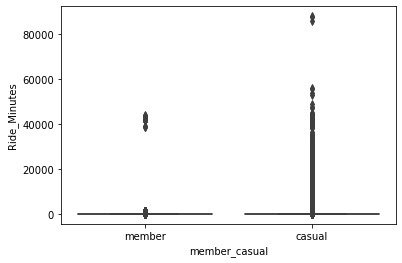

In [24]:
# #Analyzing the Difference in duration of rides between Casual riders and Members
sns.boxplot(data = df, x = 'member_casual', y = 'Ride_Minutes', order = ['member', 'casual'])
plt.show()

# figure size in inches
rcParams['figure.figsize'] = 6,4

### *1.  Analysis - casual riders use bikes for more duration (might be returning bikes after days) than members*

In [25]:
#Analyzing the Difference in Number of Rides Between Casual riders and Members

pt1 = pd.pivot_table(df, index = 'member_casual', values = 'ride_id', aggfunc = ['count'], 
                    margins = True, margins_name = 'Total count')
pt1

,count
,ride_id
member_casual,
casual,2135768
member,2629447
Total count,4765215


In [26]:
# figure size in inches
rcParams['figure.figsize'] = 4,2

[Text(0, 0, '2.13577e+06'), Text(0, 0, '2.62945e+06')]

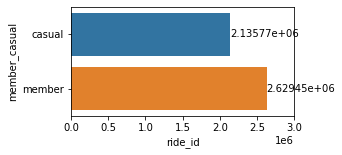

In [27]:
fig_1 = df.groupby('member_casual', as_index=False).count()
ax = sns.barplot(data = fig_1, x = 'ride_id', y = 'member_casual',)
ax.set_xlim(0,3000000)
ax.bar_label(ax.containers[0])

### *2.  Analysis - members use bikes more oftenly than casual riders*

In [28]:
# No. of rides taken by casual and members every month

pt2 = pd.pivot_table(df, index = ['Year','Month', 'member_casual'],
                    values = 'ride_id', aggfunc =['count'], margins = True, margins_name = 'Total Count')
pt2

count
                                     ride_id
Year        Month     member_casual         
2021        January   casual           10081
                      member           47065
            February  casual           10504
                      member           40402
            March     casual           83721
                      member          144159
            April     casual          135467
                      member          200128
            May       casual          253985
                      member          273081
            June      casual          365723
                      member          355826
            July      casual          436667
                      member          376940
            August    casual          408200
                      member          388580
            September casual            1395
                      member            3519
            October   casual          254665
                      member          369897
            November  casual          105902
                      member          251524
            December  casual           69458
                      member          178326
Total Count                          4765215

In [29]:
# figure size in inches
rcParams['figure.figsize'] = 11,6

(0.0, 450000.0)

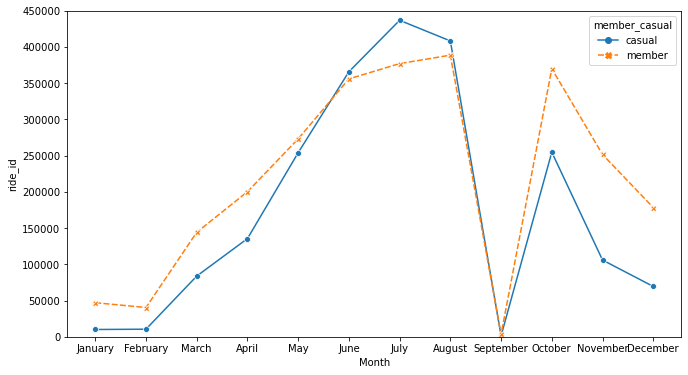

In [30]:
fig_2 = df.groupby(['Year','Month', 'member_casual'], as_index=False).count()
ax = sns.lineplot(data = fig_2, y = 'ride_id', x = 'Month', hue = 'member_casual', style = 'member_casual', markers = True)
ax.set_ylim(0,450000)

### *3.  Analysis - Every month members have take more rides than casual members except between June and August. During september, rides were lowest, maybe due to bad weather*

In [31]:
pt3 = pd.pivot_table(df, index = ['Days_of_Week', 'member_casual'],
                    values = 'ride_id', aggfunc =['count'], margins = True, margins_name = 'Total Count')
pt3

count
                            ride_id
Days_of_Week member_casual         
Sunday       casual          406025
             member          322375
Monday       casual          240207
             member          361831
Tuesday      casual          238640
             member          403529
Wednesday    casual          232113
             member          404560
Thursday     casual          232819
             member          376706
Friday       casual          310036
             member          386195
Saturday     casual          475928
             member          374251
Total Count                 4765215

In [32]:
rcParams['figure.figsize'] = 6,4

(0.0, 500000.0)

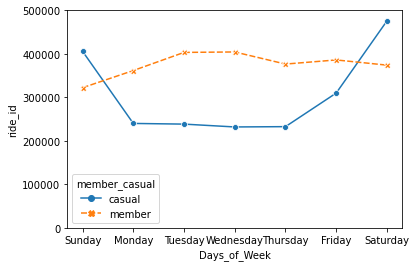

In [33]:
fig_3 = df.groupby(['Days_of_Week', 'member_casual'], as_index=False).count()
ax = sns.lineplot(data = fig_3, y = 'ride_id', x = 'Days_of_Week', hue = 'member_casual', style = 'member_casual', markers = True)
ax.set_ylim(0,500000)

### *4.  Analysis - On weekends, no. of rides were highest in comparison to weekdays*

In [34]:
pt4 = pd.pivot_table(df, index = ['Hours', 'member_casual'],
                    values = 'ride_id', aggfunc =['count'], margins = True, margins_name = 'Total Count')
pt4

count
                           ride_id
Hours       member_casual         
0           casual           45708
            member           28366
1           casual           33747
            member           18860
2           casual           22105
            member           10749
3           casual           12043
            member            6167
4           casual            8359
            member            6959
5           casual           10455
            member           25965
6           casual           21136
            member           69956
7           casual           38329
            member          128103
8           casual           52573
            member          148387
9           casual           63387
            member          112095
10          casual           87978
            member          111235
11          casual          114576
            member          133813
12          casual          137234
            member          155466
13          casual          147452
            member          154005
14          casual          152230
            member          151051
15          casual          159732
            member          173116
16          casual          173503
            member          220291
17          casual          199224
            member          273870
18          casual          179271
            member          231720
19          casual          141057
            member          166700
20          casual          104630
            member          113114
21          casual           88137
            member           82564
22          casual           80537
            member           63021
23          casual           62365
            member           43874
Total Count                4765215

In [35]:
rcParams['figure.figsize'] = 8,6

(0.0, 24.0)

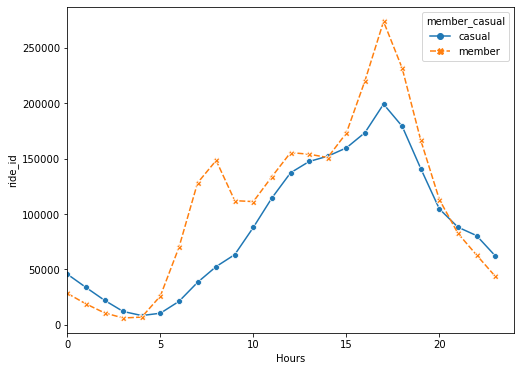

In [36]:
fig_4 = df.groupby(['Hours', 'member_casual'], as_index=False).count()
ax = sns.lineplot(data = fig_4, y = 'ride_id', x = 'Hours', hue = 'member_casual', style = 'member_casual', markers = True)
ax.set_xlim(0,24)

### *5.  Analysis - Number of rides increases in the evening hours. This is the time when people leave their offices*

In [37]:
pt5 = pd.pivot_table(df,
               index = 'member_casual',
               values = ['Ride_Minutes'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')
pt5

,mean
,Ride_Minutes
member_casual,
casual,33.936571
member,14.310987
Total Ride Average,23.107168


In [38]:
rcParams['figure.figsize'] = 5,3

[Text(0, 0, '33.94'), Text(0, 0, '14.31')]

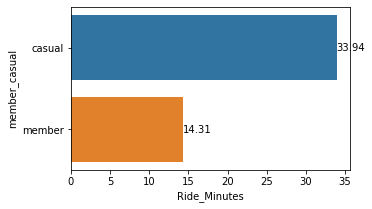

In [39]:
fig_5 = round(df.groupby('member_casual', as_index=False).mean(),2)

ax = sns.barplot(data = fig_5, x = 'Ride_Minutes', y = 'member_casual')
ax.bar_label(ax.containers[0])

### *6.  Analysis - By Surprise, casual riders drive for more duration than members*

In [40]:
pt6 = pd.pivot_table(df, index = ['Year','Month', 'member_casual'],
                    values = 'Ride_Minutes', aggfunc =['mean'], margins = True, margins_name = 'Total Average Ride')
pt6

mean
                                           Ride_Minutes
Year               Month     member_casual             
2021               January   casual           40.483980
                             member           14.714544
                   February  casual          100.521992
                             member           20.598980
                   March     casual           39.530847
                             member           14.565917
                   April     casual           38.223626
                             member           15.678361
                   May       casual           39.603721
                             member           14.691377
                   June      casual           37.864045
                             member           15.854249
                   July      casual           33.127871
                             member           14.090150
                   August    casual           29.593405
                             member           15.381785
                   September casual          330.045878
                             member          120.642512
                   October   casual           29.385656
                             member           12.346605
                   November  casual           23.754613
                             member           12.021175
                   December  casual           23.281494
                             member           10.716912
Total Average Ride                            23.107168

In [41]:
rcParams['figure.figsize'] = 14,8

[Text(0, 0, '14.71'),
 Text(0, 0, '20.6'),
 Text(0, 0, '14.57'),
 Text(0, 0, '15.68'),
 Text(0, 0, '14.69'),
 Text(0, 0, '15.85'),
 Text(0, 0, '14.09'),
 Text(0, 0, '15.38'),
 Text(0, 0, '120.64'),
 Text(0, 0, '12.35'),
 Text(0, 0, '12.02'),
 Text(0, 0, '10.72')]

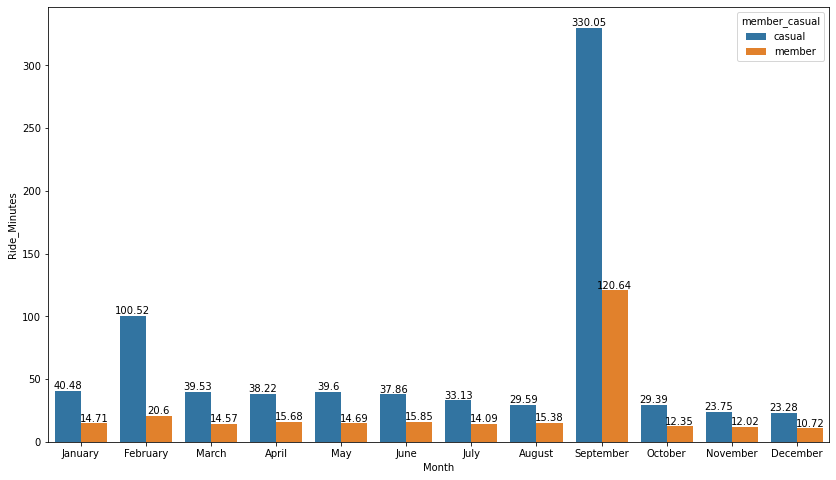

In [42]:
fig_6 = round(df.groupby(['Year','Month','member_casual'], as_index=False).mean(),2)

ax = sns.barplot(data = fig_6, x = 'Month', y = 'Ride_Minutes', hue = 'member_casual')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

### *7.  Analysis - In every month, average duration of casual riders is twice more than the average duration of members*

In [43]:
pt7 = pd.pivot_table(df, index = ['Days_of_Week', 'member_casual'],
                    values = 'Ride_Minutes', aggfunc =['mean'], margins = True, margins_name = 'Total Average Ride')
pt7

mean
                                 Ride_Minutes
Days_of_Week       member_casual             
Sunday             casual           39.255194
                   member           17.301658
Monday             casual           35.379802
                   member           14.285492
Tuesday            casual           29.664499
                   member           13.829078
Wednesday          casual           30.160194
                   member           13.436187
Thursday           casual           29.346952
                   member           13.243105
Friday             casual           32.185762
                   member           13.343798
Saturday           casual           36.040313
                   member           15.297712
Total Average Ride                  23.107168

In [44]:
rcParams['figure.figsize'] = 10,8

[Text(0, 0, '17.3'),
 Text(0, 0, '14.29'),
 Text(0, 0, '13.83'),
 Text(0, 0, '13.44'),
 Text(0, 0, '13.24'),
 Text(0, 0, '13.34'),
 Text(0, 0, '15.3')]

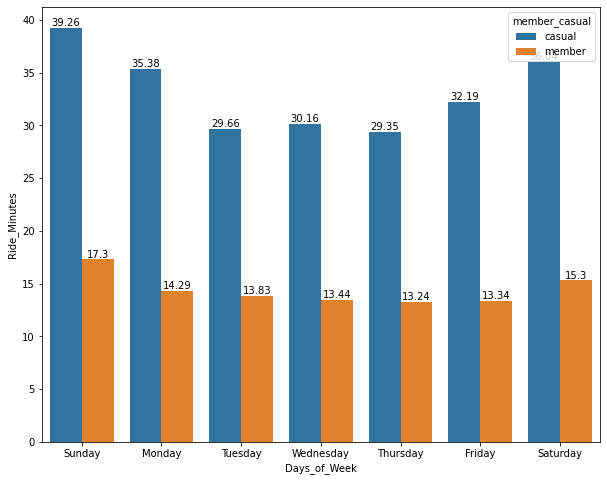

In [45]:
fig_7 = round(df.groupby(['Days_of_Week', 'member_casual'], as_index=False).mean(),2)

ax = sns.barplot(data = fig_7, x = 'Days_of_Week', y = 'Ride_Minutes', hue = 'member_casual')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

### *8.  Analysis - In Weekends casual riders ride length is maximum when compared to Weekdays. Members' ride length tend to be almost same in all Weekdays and marginally higher in Weekends. Both Casual riders and Members use bikes for long rides during Weekends.*

In [46]:
by_rides = pd.Series(df['rideable_type']).value_counts().sort_values()
by_rides.index = pd.Index(by_rides.index)
df_rides = by_rides.rename_axis('bikes').reset_index(name='counts')
df_rides

,bikes,counts
0,docked_bike,275283
1,electric_bike,1737282
2,classic_bike,2752650


In [47]:
rcParams['figure.figsize'] = 6,4

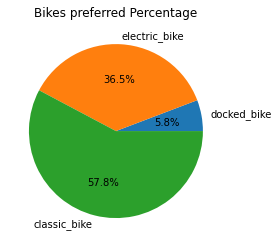

In [48]:
plt.pie(df_rides['counts'],labels=df_rides['bikes'], autopct='%1.1f%%')
plt.title('Bikes preferred Percentage')
plt.show()

### *9.  Analysis - More than 50& of riders prefer Classic bike and then electric bike*

# Based on above Analysis following Marketing Strategies can be adopted by Company 

1. A new Annual Membership package for Weekend usage only will attract current Weekend casual riders.

2. Promotions aiming at current Weekday casual riders must be implemented as soon as possible. Those promotions must include the financial savings of taking membership when compared to single passes and full day passes for a year long period.

3. A Loyalty Program for casual riders can be implemented, where occasional membership fees discounts must be given to casual riders with high loyalty points.

4. Special discount offer should be given to members during peak hours in the evening time to attract casual riders

5. Marketing of Membership programme between May-August should be extensively done as during this period casual riders surpass annual members.